# Tareas

<div class="alert alert-warning">
Fecha límite de entrega: 30 de Septiembre, 2021 23:59
</div>

In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact, fixed, widgets

Populating the interactive namespace from numpy and matplotlib


In [2]:
class RegresionLineal:
    def __init__(self, alpha=0.03, max_iters=10000, tols=0.00001):
        """
        Parámetros.
        ---------------
        alpha = Learning rate
        max_iters = Número máximo de iteraciones
        tols = definición de convergencia
        """
        self.alpha = alpha
        self.max_iters = max_iters
        self.tols = tols
        self.breaking_iteration = None
        self.historia = {'costo':[], 'beta':[]}  # Con fines de graficación
        
    def gradientDescent(self, x, y):
        """
        Parámetros:
        ---------------
        x = vector de entrenamiento de features
        y = vector de entrenamiento de variable a predecir (target)
        """    
        
        # ajustamos el vector de features
        unos = np.ones((x.shape[0], 1))
        Xt = x.reshape(x.shape[0], 1)
        Xt = np.concatenate((unos, Xt), axis=1)
        
        i = 0
        prep_J = 0
        m, n = Xt.shape
        self.beta = np.zeros(n) 
        
        while i < self.max_iters:     
            # Actualizamos beta
            self.beta = self.beta - self.alpha * self.gradiente(Xt, y)
            
            J = self.costo(Xt, y)
            
            if abs(J - prep_J) <= self.tols:
                print('La función convergió con beta: %s en la iteración %i' % ( str(self.beta), i ))
                self.breaking_iteration = i
                break
            else:
                prep_J = J
            
            self.historia['costo'].append(J)
            self.historia['beta'].append(self.beta)                
            i += 1
    
    def hipotesis(self, x):
        return np.dot(x, self.beta)
    
    def costo(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y
        return np.dot(error.T, error) / (2 * m) 
    
    def gradiente(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y        
        return np.dot(x.T, error) / m    

## Problema 1

**(a)** Usando **SimPy** demostrar que 

$$
\frac{\partial}{\partial \beta_j} \textbf{J}(\beta) = \frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}(x^{(i)}) - y(x^{(i)})\right) \cdot x^{(i)}_j
$$
Para el caso de $\beta_0, \beta_1$ en $J(\beta_0,\beta_1)$.

Definimos 𝐽(𝛽0,𝛽1) como:

$$\textbf{J}(\beta_0, \beta_1) = \frac{1}{2m}\sum_{(x^{(i)}, y^{(i)}) \in X \times Y} (y^{(i)} - \hat{y}^{(i)}(x^{(i)}))^2 = \frac{1}{2m}\sum_{(x^{(i)}, y^{(i)}) \in X \times Y} (y^{(i)} - \beta_0 - \beta_1 x^{(i)})^2$$

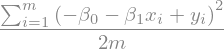

In [24]:
from sympy import *


init_printing()

y,x,b0,b1,m,i = symbols ('y x beta0 beta1 m i')
func = 1/(2*m)*Sum(((Indexed(y,i))- b0 - b1*Indexed(x,i))**2,(i,1,m))

func

Ahora para demostrar sacamos la derivada parcial respecto a bo y a b1

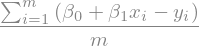

In [26]:
derivada_b0 = diff(func,b0)

simplify(derivada_b0)

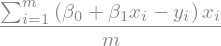

In [27]:
derivada_b1 = diff(func,b1)

simplify(derivada_b1)

Como podemos ver, queda demostrado que:

$$
\frac{\partial}{\partial \beta_j} \textbf{J}(\beta) = \frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}(x^{(i)}) - y(x^{(i)})\right) \cdot x^{(i)}_j
$$
Para el caso de $\beta_0, \beta_1$ en $J(\beta_0,\beta_1)$.

## Problema 2

Usando el ejemplo de la clase ( i.e. Los archivos `edad.dat` y `altura.dat` contienen las mediciones de las estaturas (en metros) de varios niños entre las edad de 2 y 8 años. Cada _tupla_ de altura y edad, constituyen un ejemplo de entrenamiento $(x^{(i)}, y^{(i)})$ de nuestros datos. Hay $m = 50$ datos para entrenar que usaremos para realizar un modelo de regresión lineal. ) :

**(a)** Grafique $\textbf{J}(\beta)$ del ejercicio en $3D$ y en una gráfica de contorno. 

**(b)** Indique con un punto el valor de $\textbf{J}(\beta)$ en la última iteración.

**(c)** Modifique el _widget_ para mostrar conforme pasan las iteraciones como el valor de $\textbf{J}(\beta)$ se acerca al mínimo en la gráfica de contorno.

**(d)** Agrega al _widget_ un control para modificar $\alpha$ (habrá que agregar el entrenamiento del modelo a la función que estás realizando para este _widget_)

In [61]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact, fixed, widgets, IntSlider, FloatSlider

Populating the interactive namespace from numpy and matplotlib


In [29]:
#a) Grafique  𝐉(𝛽)  del ejercicio en  3𝐷  y en una gráfica de contorno.

def J (beta0,beta1):
    x = np.loadtxt("edad.dat")
    y = np.loadtxt("altura.dat")
    n = len(y)
    costo = 0
    for i in range(n):
        costo += 1/(2*n)*(y[i]-beta0-beta1*x[i])**2
    return costo

In [42]:
beta0 = np.arange(-2,2,0.1)
beta1 = np.arange(-2,2,0.1)
B0, B1 = np.meshgrid(beta0, beta1)
C = J(B0,B1)
print(C)

[[89.58734377 88.30116077 87.02497777 ... 48.65857277 47.74238977
  46.83620677]
 [82.76235282 81.52540554 80.29845826 ... 43.65530346 42.78835618
  41.9314089 ]
 [76.20902282 75.02131126 73.8435997  ... 38.92369509 38.10598353
  37.29827196]
 ...
 [17.98886884 18.52440747 19.0699461  ... 44.46379814 45.36933677
  46.2848754 ]
 [21.21533289 21.80010724 22.39488159 ... 49.51198383 50.46675817
  51.43153252]
 [24.7134579  25.34746797 25.99147804 ... 54.83183046 55.83584053
  56.8498506 ]]


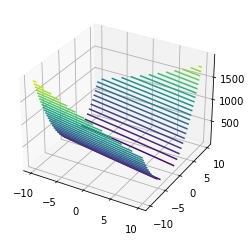

In [32]:
fig = plt.figure()
ax = plt.axes(projection= '3d')
ax.contour3D(B0,B1,C,25)

plt.show()

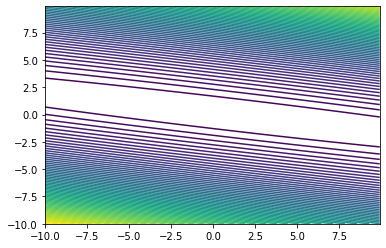

In [36]:
plt.contour(B0,B1,C,75)

plt.show()

In [39]:
#b) Indique con un punto el valor de  𝐉(𝛽)  en la última iteración.

x = np.loadtxt("edad.dat")
y = np.loadtxt("altura.dat")

RegLin = RegresionLineal()
RegLin.gradientDescent(x,y)

La función convergió con beta: [0.57873101 0.095071  ] en la iteración 455


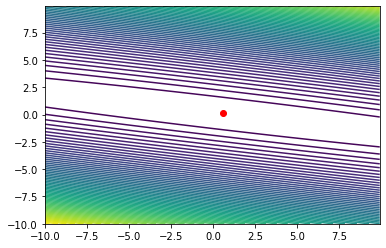

In [41]:
plt.contour(B0,B1,C,75)
plt.plot(RegLin.beta[0],RegLin.beta[1], 'ro')
plt.show()

In [53]:
#c) Modifique el widget para mostrar conforme pasan las iteraciones como el valor de  𝐉(𝛽)  
#   se acerca al mínimo en la gráfica de contorno.

def iterando (i):
    plt.contour(B0,B1,C,75)
    plt.plot(RegLin.beta[0],RegLin.beta[1],'go')
    plt.plot(RegLin.historia['beta'][i][0], RegLin.historia['beta'][i][1], 'ro')
    plt.show()

In [54]:
interact(iterando, i=IntSlider(min=0,max=454,step=1,value=0));

interactive(children=(IntSlider(value=0, description='i', max=454), Output()), _dom_classes=('widget-interact'…

In [68]:
#d) Agrega al widget un control para modificar  𝛼  
#   (habrá que agregar el entrenamiento del modelo a la función que estás realizando para este widget)

def funcion (alpha=0.03):
    x = np.loadtxt("edad.dat")
    y = np.loadtxt("altura.dat")
    RegLin = RegresionLineal(alpha)
    return RegLin.gradientDescent(x,y)
    

In [73]:
interact(funcion, alpha = FloatSlider(min=0.0001,max=0.01,step=0.00001,value=0.01));

interactive(children=(FloatSlider(value=0.01, description='alpha', max=0.01, min=0.0001, step=1e-05), Output()…

## Problema 3

**(a)**  Usando los datos de `chirps.txt`

In [4]:
%cat data/chirps.txt

#Chirps/Second 	Temperature (º F)
20.0 	88.6
16.0 	71.6
19.8 	93.3
18.4 	84.3
17.1 	80.6
15.5 	75.2
14.7 	69.7
15.7 	71.6
15.4 	69.4
16.3 	83.3
15.0 	79.6
17.2 	82.6
16.0 	80.6
17.0 	83.5
14.4 	76.3


[[20.  88.6]
 [16.  71.6]
 [19.8 93.3]
 [18.4 84.3]
 [17.1 80.6]
 [15.5 75.2]
 [14.7 69.7]
 [15.7 71.6]
 [15.4 69.4]
 [16.3 83.3]
 [15.  79.6]
 [17.2 82.6]
 [16.  80.6]
 [17.  83.5]
 [14.4 76.3]]


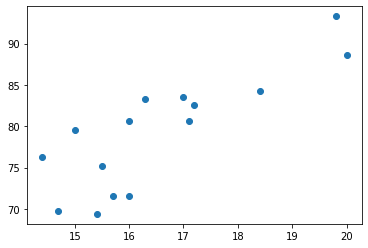

In [58]:
data = np.loadtxt("chirps.txt", dtype = "float", delimiter = "\t")
x=[]
y=[]
for i in data:
    x.append(float(i[0]))
    y.append(float(i[1]))
X= np.array(x)
Y= np.array(y)

plt.scatter(X,Y, label = "chirps")

Entrenar una regresión lineal. Grafique los datos y el mejor modelo. Explique como llegó a los valores de $\alpha$. ¿Coinciden con los mostrados en la página web?


**NOTA**: Datos obtenidos de [aquí](http://mathbits.com/MathBits/TISection/Statistics2/linearREAL.htm)


In [136]:
RegLin = RegresionLineal(alpha = 0.007, max_iters = 10000000, tols = 0.00000001)
RegLin.gradientDescent(X,Y)

La función convergió con beta: [22.52829597  3.42948978] en la iteración 432138


El valor de 𝛼 que termine utilizando fue 0.007, debido a que al bajar el valor de 𝛼 beta se alejaba mas de el valor de la pagina (beta = 22.84898231) y al tratar de subirlo (alpha = 0.008) me marcaba un error. Por lo que llegue al valor de 𝛼 despues de trial and error

## Problema 4

**(a)** Usando los datos del [cuarteto de Anscombe](http://en.wikipedia.org/wiki/Anscombe%27s_quartet) Calcule la regresión lineal ¿Qué sucede?

In [111]:
#a)

X1 = np.array ([10.,8.,13.,9.,11.,14.,6.,4.,12.,7.,5.])
Y1 = np.array ([8.04,6.95,7.58,8.81,8.33,9.96,7.24,4.26,10.84,4.82,5.68])

X2 = np.array ([10,8,13,9,11,14,6,4,12,7,5])
Y2 = np.array ([9.14,8.14,8.74,8.77,9.26,8.1,6.13,3.1,9.13,7.26,4.74])

X3 = np.array ([10,8,13,9,11,14,6,4,12,7,5])
Y3 = np.array ([7.46,6.77,12.74,7.11,7.81,8.84,6.08,5.39,8.15,6.42,5.73])

X4 = np.array ([8,8,8,8,8,8,8,19,8,8,8])
Y4 = np.array ([6.58,5.76,7.71,8.84,8.47,7.04,5.25,12.5,5.56,7.91,6.89])

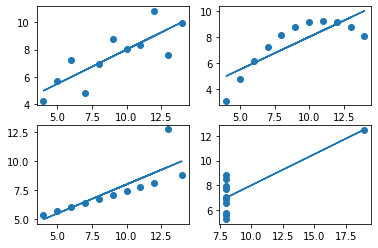

In [127]:
fig, ax = plt.subplots(2,2)
modelo = lambda x,b,m: b + m*x

ax[0,0].scatter(X1,Y1)
ax[0,0].plot(X1, modelo(X1, 2.98340315, 0.50174332))

ax[0,1].scatter(X2,Y2)
ax[0,1].plot(X2, modelo(X2, 2.9842221,  0.50165234))

ax[1,0].scatter(X3,Y3)
ax[1,0].plot(X3, modelo(X3, 2.98576412, 0.50137995))

ax[1,1].scatter(X4,Y4)
ax[1,1].plot(X4, modelo(X4, 2.98504106, 0.50156135))


In [113]:
RegLin = RegresionLineal(alpha = 0.003, max_iters = 10000000, tols = 0.00000001)
RegLin.gradientDescent(X1,Y1)
RegLin.gradientDescent(X2,Y2)
RegLin.gradientDescent(X3,Y3)
RegLin.gradientDescent(X4,Y4)

La función convergió con beta: [2.98340315 0.50174332] en la iteración 15818
La función convergió con beta: [2.9842221  0.50165234] en la iteración 15819
La función convergió con beta: [2.98576412 0.50137995] en la iteración 15820
La función convergió con beta: [2.98504106 0.50156135] en la iteración 15820


Podemos ver que a pesar de que los 4 diferentes grupos de dato son sumamente diferente entre ellos, sin embargo, tienen una regresion lineal sumamente parecida

## Problema 5

Use el archivo `radioactive_decay.dat`

In [5]:
%cat dat a/radioactive_decay.txt

#time   N_(remaining)
0.0	10.48
1.0	7.54
2.0	5.49
3.0	4.02
4.0	2.74
5.0	2.02
6.0	1.50
7.0	1.09
8.0	0.68
9.0	0.57
10.0	0.37
11.0	0.31
12.0	0.19
13.0	0.15
14.0	0.13
15.0	0.11


**(a)** Grafique los datos ¿Qué forma tienen?

**(b)** ¿Qué transformación se le ocurre para linearizarlos? Explique y grafique de nuevo. Guarde los datos transformados en un archivo llamado `transform_radioactive_decay.txt`

**(c)** Aplique la regresión lineal a este conjunto de datos transformado, leyendo los datos del archivo recién creado.

**(d)** ¿Cuáles son los valores de $\beta$ que mejor ajustan? ¿Cuáles son el espacio sin transformar? Explique.

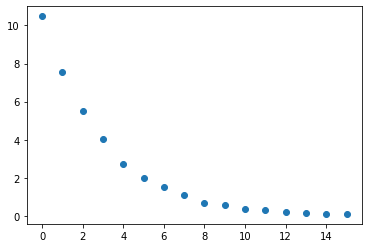

In [75]:
#a) Grafique los datos ¿Qué forma tienen?

datos = np.loadtxt("radioactive_decay.txt", dtype = "float", delimiter = "\t")

time = []
N = []

for i in datos:
    time.append(float(i[0]))
    N.append(float(i[1]))

x = np.array(time)
y = np.array(N)

plt.scatter(x,y, label = "Radioactive Decay")

Como podemos ver, los datos tienen una forma exponencial decreciente

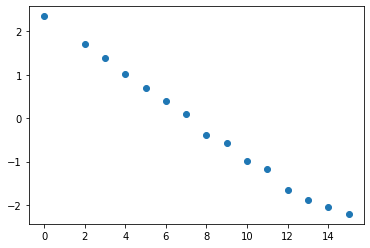

In [76]:
#b) ¿Qué transformación se le ocurre para linearizarlos? Explique y grafique de nuevo. 
# Guarde los datos transformados en un archivo llamado transform_radioactive_decay.txt

import math
datos = np.loadtxt("radioactive_decay.txt", dtype = "float", delimiter = "\t")

time = []
N = []
j = 0

for i in datos:
    if (j == 0):
        time.append(float(i[0]))
        N.append(math.log(float(i[1])))
        j = 1
    elif (j == 1): 
        j = 2
    else:
        time.append(float(i[0]))
        N.append(math.log(float(i[1])))
        
x1 = np.array(time)
y1 = np.array(N)

#out = open('transform_radioactive_decay.txt', 'w')
#out.write(x1 + "")
#out.write(y1 + "")
#out.close()

plt.scatter(x1,y1, label = "Radioactive Decay")

In [77]:
#c) Aplique la regresión lineal a este conjunto de datos transformado, leyendo los datos del archivo recién creado.

RegLin = RegresionLineal(alpha = 0.003, max_iters = 10000000, tols = 0.00000001)
RegLin.gradientDescent(x1,y1)


La función convergió con beta: [ 2.27872771 -0.31496075] en la iteración 8049


La función convergió con beta: [ 2.27872771 -0.31496075] en la iteración 8049


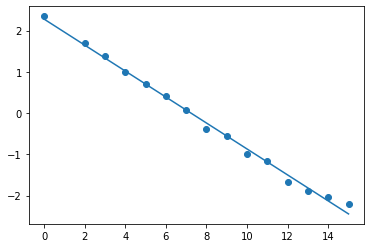

In [78]:
RegLin = RegresionLineal(alpha = 0.003, max_iters = 10000000, tols = 0.00000001)
RegLin.gradientDescent(x1,y1)

modelo = lambda x,b,m: b + m*x

plt.scatter(x1,y1)
plt.plot(x1, modelo(x1, 2.27872771, -0.31496075))


[[ 0.   10.48]
 [ 1.    7.54]
 [ 2.    5.49]
 [ 3.    4.02]
 [ 4.    2.74]
 [ 5.    2.02]
 [ 6.    1.5 ]
 [ 7.    1.09]
 [ 8.    0.68]
 [ 9.    0.57]
 [10.    0.37]
 [11.    0.31]
 [12.    0.19]
 [13.    0.15]
 [14.    0.13]
 [15.    0.11]]
La función convergió con beta: [ 6.45023151 -0.54868949] en la iteración 8429


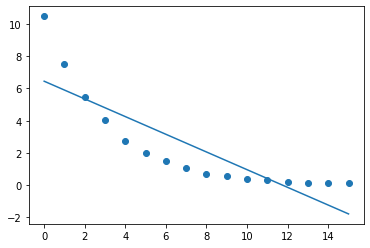

In [51]:
#Para los datos sin transformar

datos = np.loadtxt("radioactive_decay.txt", dtype = "float", delimiter = "\t")

time = []
N = []

for i in datos:
    time.append(float(i[0]))
    N.append(float(i[1]))

x = np.array(time)
y = np.array(N)

RegLin = RegresionLineal(alpha = 0.003, max_iters = 10000000, tols = 0.00000001)
RegLin.gradientDescent(x,y)

modelo = lambda x,b,m: b + m*x

plt.scatter(x,y)
plt.plot(x, modelo(x, 6.45023151, -0.54868949))

d) ¿Cuáles son los valores de  𝛽  que mejor ajustan? ¿Cuáles son el espacio sin transformar? Explique.

Los valores de beta para los datos tranformados son: 3.08555424 -1.77711541

Mientras que, como podemos ver en la grafica de arriba, para los datos sin tranformar es: 6.45023151 -0.54868949

Sin embargo, como antes se menciono, la grafica tiene forma de exponencial, por lo que una linearizacion no es muy util en este caso. Por lo que tenemos dos opciones, como hicimos, podemos linealizar los datos usando log y despues haciendo la regresion lineal con los nuevos datos, o bien, usar algo llamado regresion exponencial.